In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_file(path,encoding="utf-16"):
    df = pd.read_csv(path, encoding=encoding)
    return df

questions = read_file("Data/Questions.txt")
answers = read_file("Data/Answer.csv")
answers = answers.drop(0)
q_a = read_file("Data/Q_A.csv")
users = pd.read_csv('Data/U.csv', encoding="utf-16")

In [4]:
answers_q_a = pd.merge(answers, q_a, left_on='Id', right_on='AId', how='inner')
answers_question = pd.merge(answers_q_a, questions, left_on='QId', right_on='Id', how='inner', suffixes=('_A', '_Q'))

In [5]:
answers_question_user = pd.merge(answers_question, users, left_on='OwnerUserId_A', right_on='Id', how='inner',suffixes=('', '_U'))

In [6]:
answers_question_user

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,...,6357,58.0,0,2012-05-08 18:11:27,2,35,11543,1060,436,208
1,3886,2008-08-06 19:29:24.427000000,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,61344,122.0,3,NaN,72,35,11543,1060,436,208
2,11567,2008-08-14 19:26:35.570000000,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,16785,1310.0,0,NaN,4,35,11543,1060,436,208
3,19904,2008-08-21 13:37:58.600000000,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,49130,1288.0,1,NaN,18,35,11543,1060,436,208
4,26311,2008-08-25 16:01:58.660000000,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,155132,2644.0,1,NaN,43,35,11543,1060,436,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503482,28922535,2015-03-08 02:48:19.857000000,0.0,4645692.0,2.0,NaN,28922468,28922535,0,28922468,...,21,4601231.0,1,NaN,0,4645692,1,1,0,0
1503483,28922813,2015-03-08 03:40:11.950000000,0.0,3313892.0,0.0,NaN,28922649,28922813,0,28922649,...,13,4645748.0,0,NaN,0,3313892,1,0,0,0
1503484,28922747,2015-03-08 03:24:05.497000000,0.0,4643110.0,2.0,NaN,28922175,28922747,0,28922175,...,43,3562273.0,3,NaN,0,4643110,1,0,0,0
1503485,28922923,2015-03-08 04:00:36.173000000,0.0,4643110.0,0.0,NaN,28922819,28922923,0,28922819,...,25,4539695.0,1,NaN,0,4643110,1,0,0,0


In [7]:
data = answers_question_user.drop(['Id_A', 'OwnerUserId_A','Id_Q', 'AId', 'QId','OwnerUserId_Q', 'Id' ,'CreationDate_A', 'CreationDate_Q', 'ClosedDate_A','ClosedDate_Q'], axis=1)
data

,Score_A,CommentCount_A,accepted,Score_Q,ViewCount,CommentCount_Q,FavoriteCount,Reputation,Views,UpVotes,DownVotes
0,37.0,2.0,1,33,6357,0,2,11543,1060,436,208
1,133.0,1.0,1,238,61344,3,72,11543,1060,436,208
2,1.0,0.0,0,11,16785,0,4,11543,1060,436,208
3,135.0,0.0,1,69,49130,1,18,11543,1060,436,208
4,20.0,7.0,0,93,155132,1,43,11543,1060,436,208
...,...,...,...,...,...,...,...,...,...,...,...
1503482,0.0,2.0,0,0,21,1,0,1,1,0,0
1503483,0.0,0.0,0,0,13,0,0,1,0,0,0
1503484,0.0,2.0,0,0,43,3,0,1,0,0,0
1503485,0.0,0.0,0,2,25,1,0,1,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503487 entries, 0 to 1503486
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Score_A         1503487 non-null  float64
 1   CommentCount_A  1503487 non-null  float64
 2   accepted        1503487 non-null  int64  
 3   Score_Q         1503487 non-null  int64  
 4   ViewCount       1503487 non-null  int64  
 5   CommentCount_Q  1503487 non-null  int64  
 6   FavoriteCount   1503487 non-null  int64  
 7   Reputation      1503487 non-null  int64  
 8   Views           1503487 non-null  int64  
 9   UpVotes         1503487 non-null  int64  
 10  DownVotes       1503487 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 137.6 MB


In [ ]:
sns.pairplot(data)
plt.show()

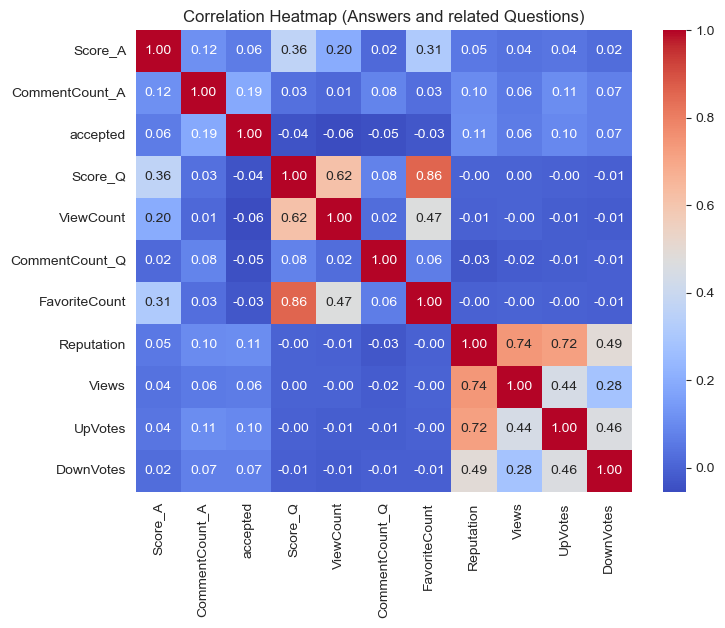

In [9]:
correlation_matrix = data.corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap`        (correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Answers and related Questions)')
plt.show()

# Training Model based on all featuers

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


X = data.drop('accepted', axis=1)
y = data['accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBClassifier()
cv_results = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Test set accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Cross-validation results: [0.75165241 0.75242145 0.75252122 0.7536644  0.75239548]
Mean accuracy: 0.7525309924388148
Test set accuracy: 0.7516411815176689
Precision: 0.6264601360934487
Recall: 0.43412624790175813


## Remove Columns with less Corr

In [10]:
xgb_model.feature_importances_

array([0.39420074, 0.21806245, 0.18625814, 0.05250674, 0.04230477,
       0.01075668, 0.0417813 , 0.0173331 , 0.01860043, 0.01819566],
      dtype=float32)

<BarContainer object of 10 artists>

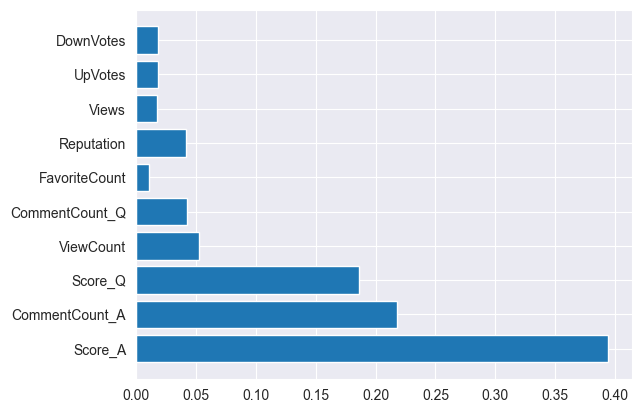

In [13]:
plt.barh(X.columns, xgb_model.feature_importances_)

<BarContainer object of 10 artists>

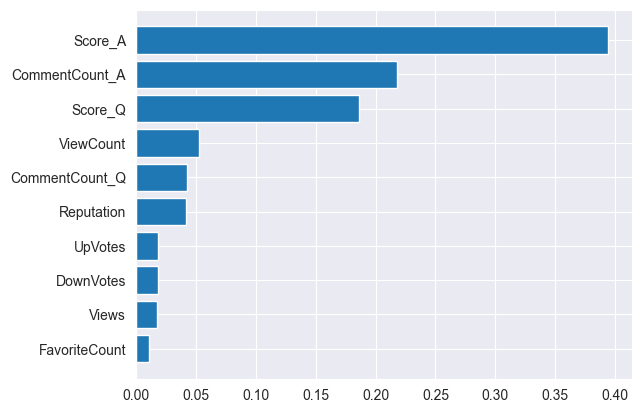

In [15]:
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])


In [ ]:
data_enhanced = data.drop(['Score_Q', 'FavoriteCount'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = data_enhanced.drop('accepted', axis=1)
y = data_enhanced['accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()

cv_results = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Test set accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Cross-validation results: [0.74381646 0.74465202 0.74429036 0.74502615 0.74453872]
Mean accuracy: 0.7444647399285963
Test set accuracy: 0.7439025201364825
Precision: 0.6159271432484251
Recall: 0.3973407544836116


## find best params

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = data.drop('accepted', axis=1)
y = data['accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Test set accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)